Index(['gender', 'age', 'marriage', 'religion', 'income'], dtype='object')
marriage         결혼         미혼         이혼
gender                                   
남자        58.192105  56.771890  57.153314
여자        57.015162  55.628506  56.000000
             age    income
age     1.000000 -0.005808
income -0.005808  1.000000


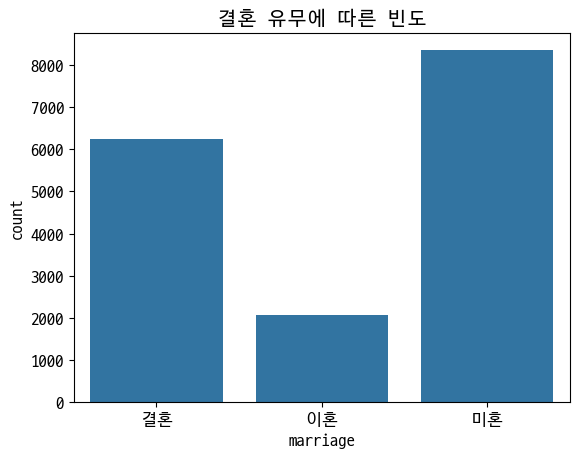

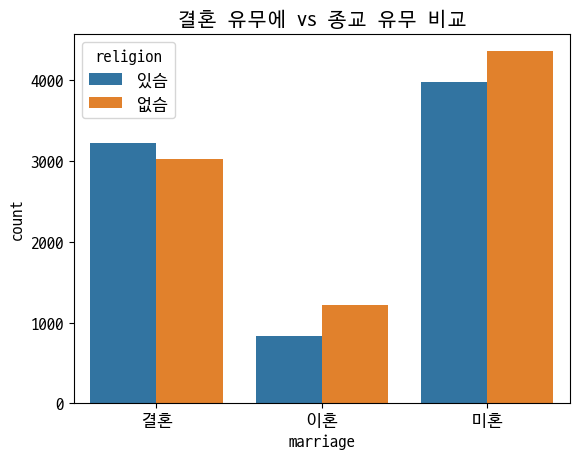

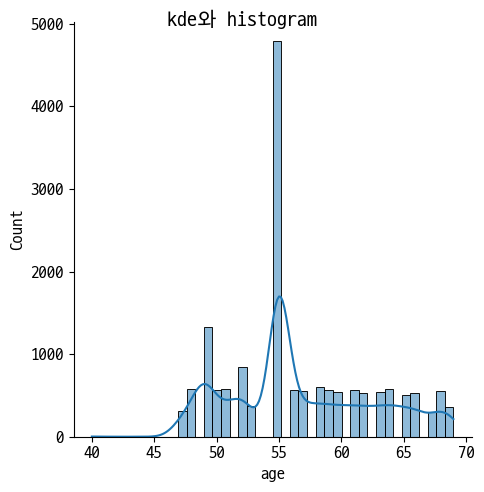

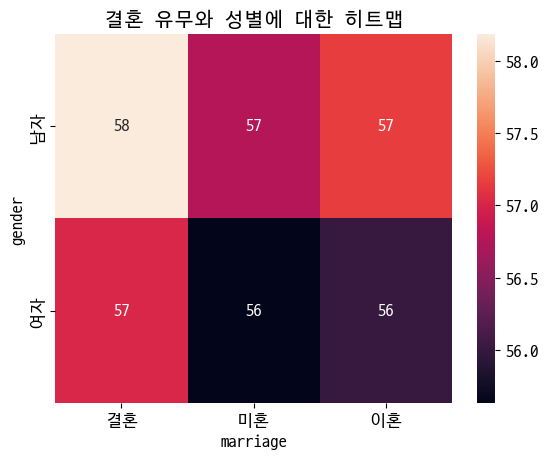

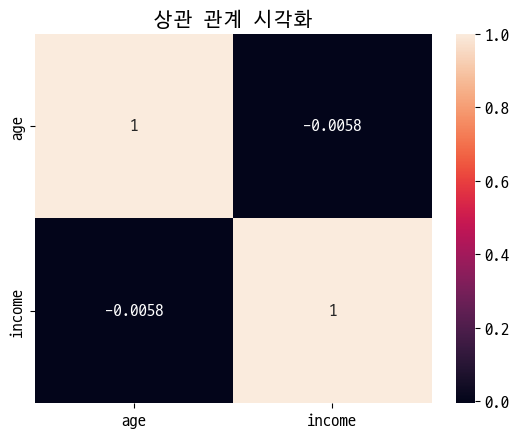

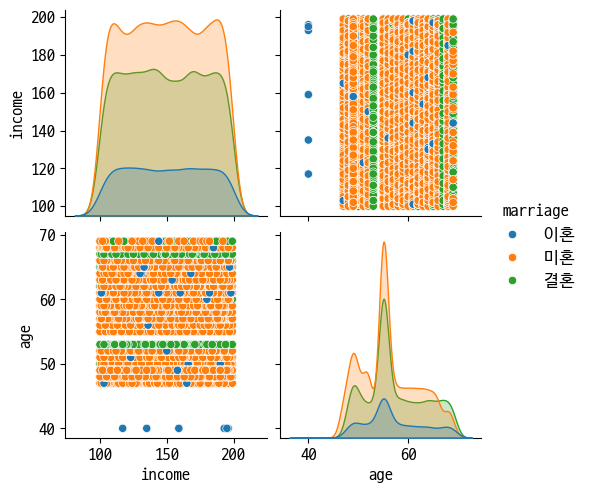

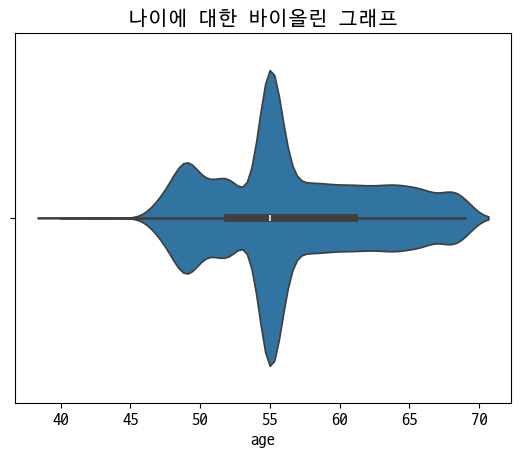

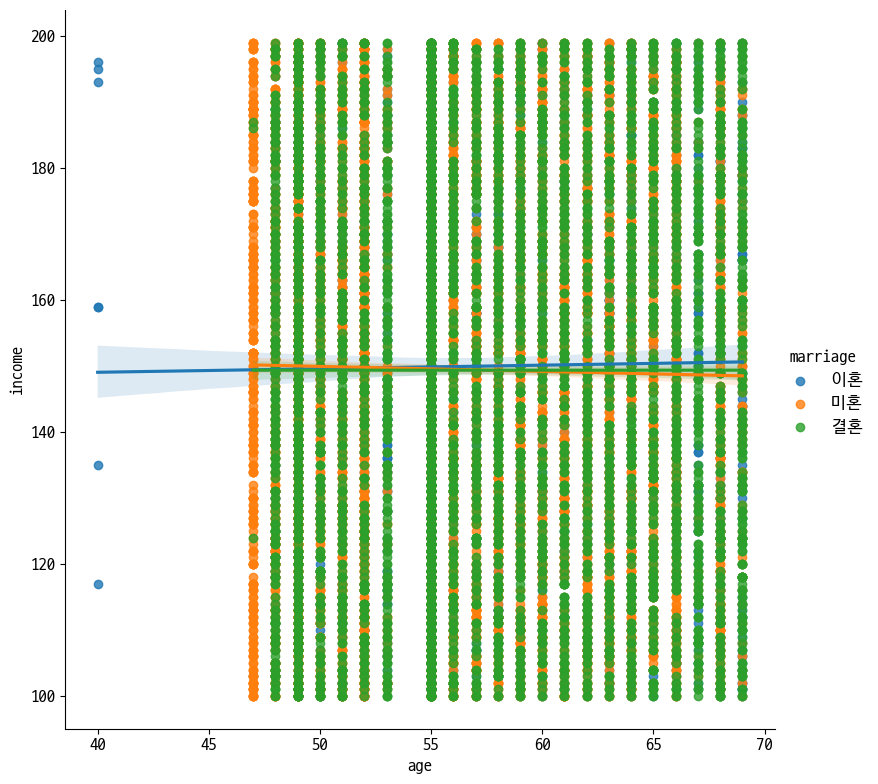

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.rc('font', family = "D2Coding")
plt.rcParams["font.size"] = 12
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams['axes.unicode_minus'] = False

filename = './../data/human_info.csv'
human = pd.read_csv(filename, encoding='cp949')
print(human.columns)

ORDERING=['결혼',  '이혼', '미혼']
plt.figure()
plt.title('결혼 유무에 따른 빈도')
sns.countplot(x='marriage', data=human, order=ORDERING)

# hue활용
plt.figure()
plt.title('결혼 유무에 vs 종교 유무 비교')
sns.countplot(x='marriage', data=human, hue='religion', legend=True, order=ORDERING)

#displot
grid = sns.displot(x='age', data=human, kde=True, rug=False)
grid.figure.suptitle('kde와 histogram')

#heatmap
pivot = human.pivot_table(index='gender', columns='marriage', values='age')
print(pivot)
plt.figure()
plt.title('결혼 유무와 성별에 대한 히트맵')
sns.heatmap(data=pivot, annot=True)

#상관관계
cor = human.corr(numeric_only=True)
print(cor)

plt.figure()
plt.title('상관 관계 시각화')
sns.heatmap(data=cor, annot=True)

#pairplot
newhuman = human.loc[:, ['income', 'age', 'marriage']] #hue로 적용할 칼럼도 추출해야 한다.
g = sns.pairplot(data=newhuman, hue='marriage')


# 바이올린
plt.figure()
plt.title('나이에 대한 바이올린 그래프')
sns.violinplot(x='age', data=human)

#lmplot
grid = sns.lmplot(x='age', y='income', data=human, hue='marriage', height=8)
